### **UCM Deterministic Example**

In the following, we will construct a deterministic *Unobserved Components Time-Series Model (UCM)* step-by-step. The general form of the model is as follows:
$$y_{t} = T_{t}+S_{t}+C_{t}+I_{t}$$
with $y_{t}$: univariate time-series; $T_{t}$: trend component; $S_{t}$: seasonal component; $C_{t}$: cyclic component; $I_{t}$: irregular component; 

In [47]:
import pandas as pd
import numpy as np
import math
import os
import copy
from src.helpers import plot_ts_and_save

In [123]:
# settings
n_ts = 100
plot_path = os.path.join(os.getcwd(), 'plots')
mu, sigma = 0, 10

#### Trend Component

In [45]:
t_dict = {
    'time' : [],
    'trend' : []
         }
for t in range(1,n_ts+1):
    t_dict['time'].append(t)
    T = 100 + 4*t
    t_dict['trend'].append(T)
    T_df = pd.DataFrame.from_dict(t_dict)
    T_df.name = 'ucm_deterministic_trend' 

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


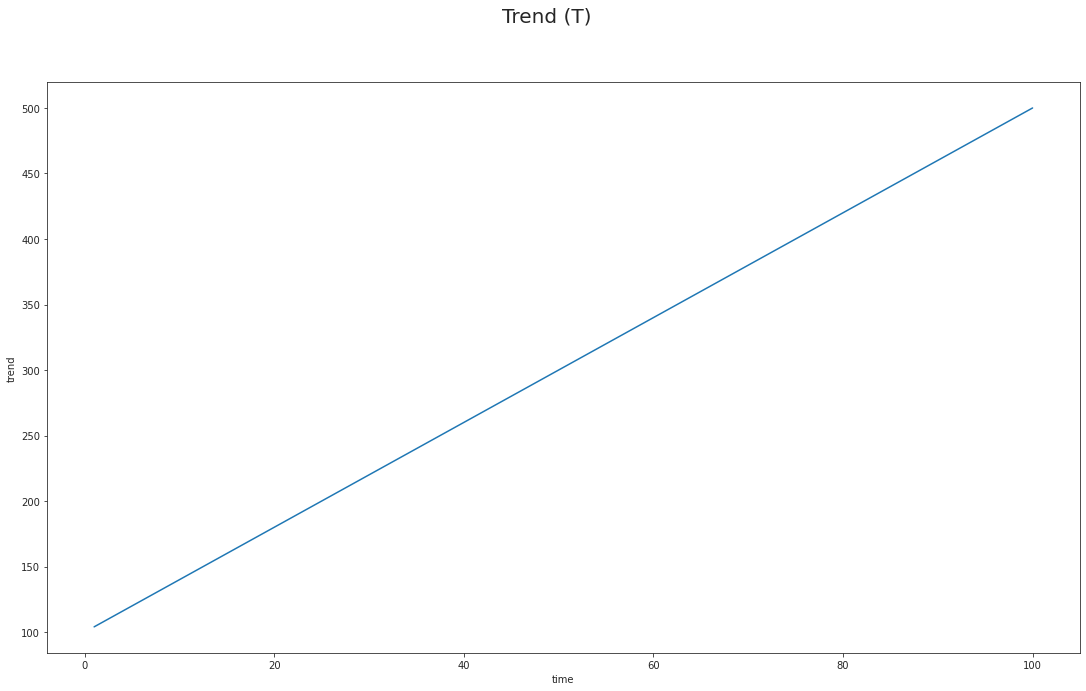

In [46]:
plot_ts_and_save(T_df, 'time', 'trend', 'Trend (T)', plot_path)

#### Cyclic Component

In [48]:
c_dict = {
    'time' : [],
    'cycle' : []
         }
for t in range(1,n_ts+1):
    c_dict['time'].append(t)
    C = 50*math.cos((math.pi*t)/10)
    c_dict['cycle'].append(C)
    C_df = pd.DataFrame.from_dict(c_dict)
    C_df.name = 'ucm_deterministic_cycle' 

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


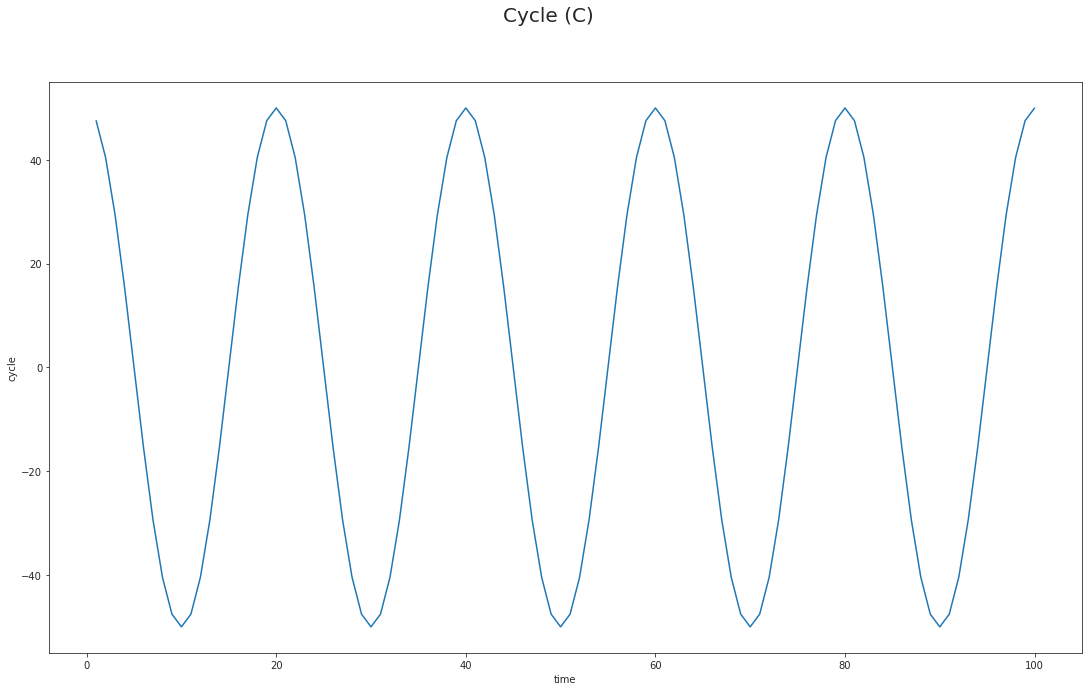

In [49]:
plot_ts_and_save(C_df, 'time', 'cycle', 'Cycle (C)', plot_path)

#### Seasonal Component

In [118]:
s_dict = {
    'time' : [],
    'seasonal effect' : []
         }
s_effects = [-50,-25,25,-25,-50,50,75,50,5,-25,-50,20,20]
idx = 0
for t in range(1,n_ts+1):
    idx = idx+1 if t%8 == 0 else idx
    idx = idx if idx < 12 else 11
    s_dict['time'].append(t)
    S = s_effects[idx] if t%8 == 0 else s_effects[idx] + ((s_effects[idx+1]-s_effects[idx])/8)
    s_dict['seasonal effect'].append(S)
    S_df = pd.DataFrame.from_dict(s_dict)
    S_df.name = 'ucm_deterministic_seasonal' 

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


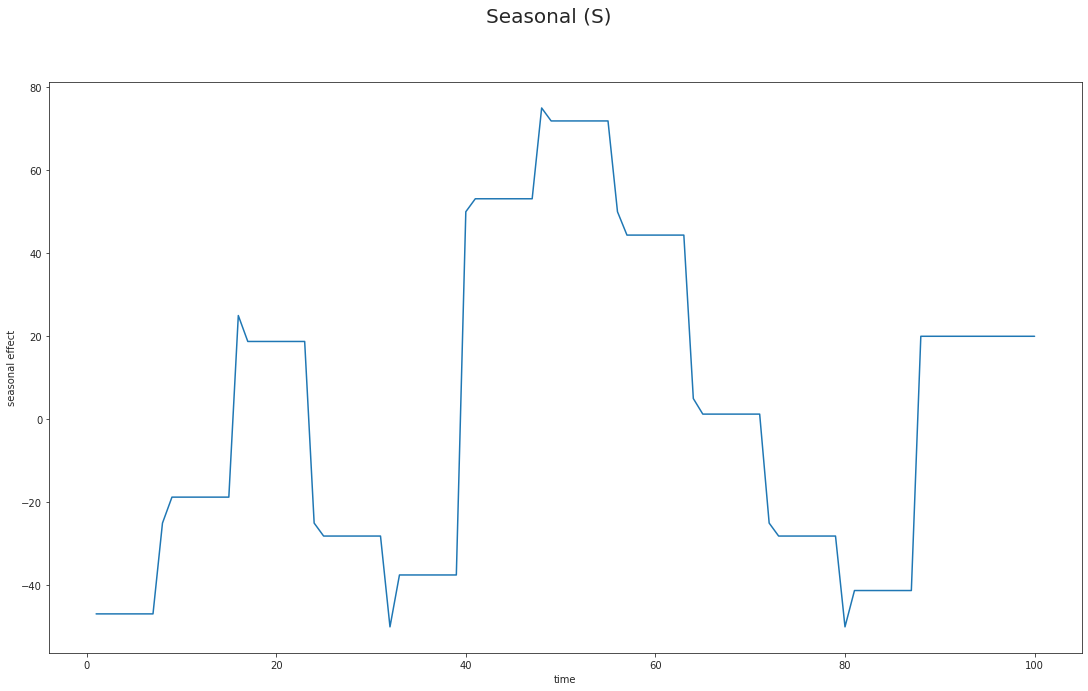

In [119]:
plot_ts_and_save(S_df, 'time', 'seasonal effect', 'Seasonal (S)', plot_path)

#### Irregular Component

In [131]:
i_dict = {
    'time' : [],
    'irregularity' : []
         }
for t in range(1,n_ts+1):
    i_dict['time'].append(t)
    samp = np.random.normal(mu, sigma, 100)
    samp_idx = np.random.choice(samp, 1, replace=False)  
    I = samp[int(samp_idx[0])]
    i_dict['irregularity'].append(I)
    I_df = pd.DataFrame.from_dict(i_dict)
    I_df.name = 'ucm_deterministic_irregular' 

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


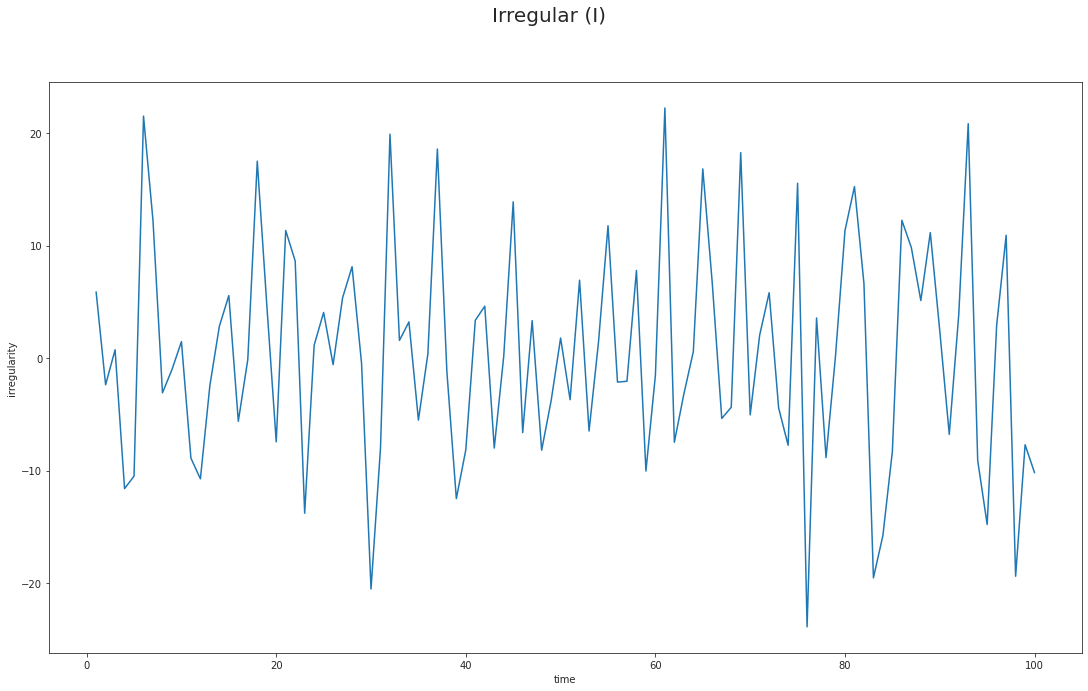

In [132]:
plot_ts_and_save(I_df, 'time', 'irregularity', 'Irregular (I)', plot_path)

#### Adding Components Iteratively

In [166]:
# first we join all dfs
Y_df = T_df \
        .merge(C_df, how='left', on=['time']) \
        .merge(S_df, how='left', on=['time']) \
        .merge(I_df, how='left', on=['time'])

In [171]:
Y_df['Y_tc'] = Y_df['trend'] + Y_df['cycle'] 
Y_df['Y_tcs'] = Y_df['trend'] + Y_df['cycle'] + Y_df['seasonal effect'] 
Y_df['Y_final'] = Y_df['trend'] + Y_df['cycle'] + Y_df['seasonal effect'] + Y_df['irregularity']
Y_df

time  trend         cycle  seasonal effect  irregularity        Y_tc  \
0      1    104  4.755283e+01          -46.875      5.885943  151.552826   
1      2    108  4.045085e+01          -46.875     -2.371960  148.450850   
2      3    112  2.938926e+01          -46.875      0.739315  141.389263   
3      4    116  1.545085e+01          -46.875    -11.608490  131.450850   
4      5    120  3.061617e-15          -46.875    -10.498660  120.000000   
..   ...    ...           ...              ...           ...         ...   
95    96    484  1.545085e+01           20.000      2.913706  499.450850   
96    97    488  2.938926e+01           20.000     10.925863  517.389263   
97    98    492  4.045085e+01           20.000    -19.401902  532.450850   
98    99    496  4.755283e+01           20.000     -7.707744  543.552826   
99   100    500  5.000000e+01           20.000    -10.201079  550.000000   

         Y_tcs     Y_final  
0   104.677826  110.563768  
1   101.575850   99.203890  
2    94.514263   95.253578  
3    84.575850   72.967360  
4    73.125000   62.626340  
..         ...         ...  
95  519.450850  522.364556  
96  537.389263  548.315125  
97  552.450850  533.048948  
98  563.552826  555.845082  
99  570.000000  559.798921  

[100 rows x 8 columns]

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


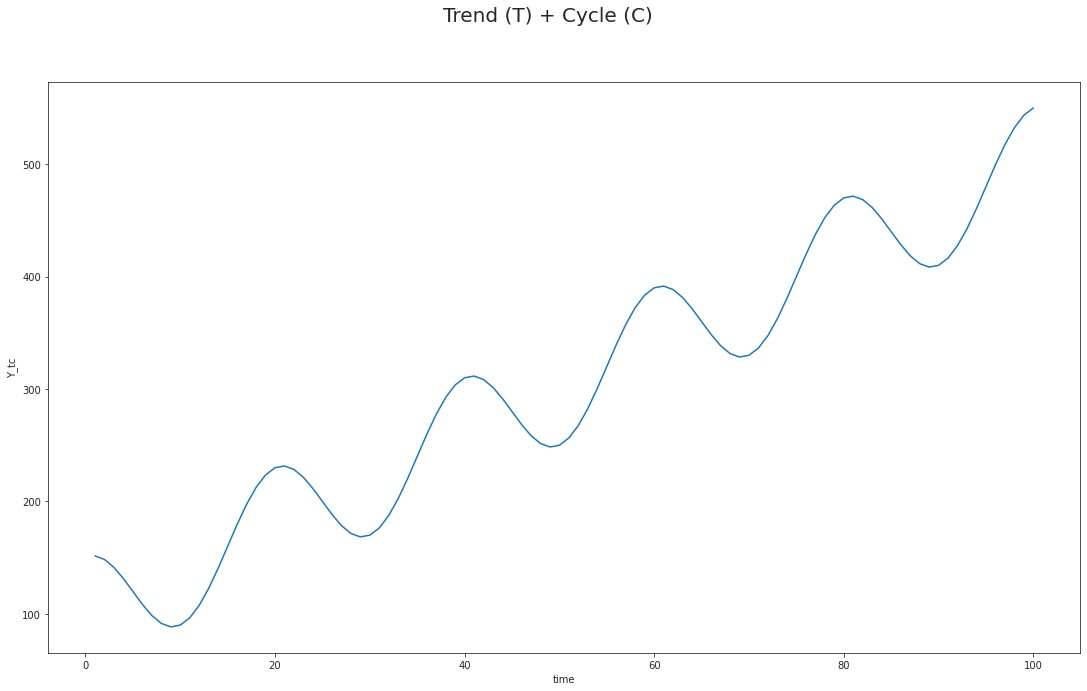

In [172]:
# plot trend + cycle
Y_df.name = 'ucm_deterministic_trend_cycle'
plot_ts_and_save(Y_df, 'time', 'Y_tc', 'Trend (T) + Cycle (C)', plot_path)

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


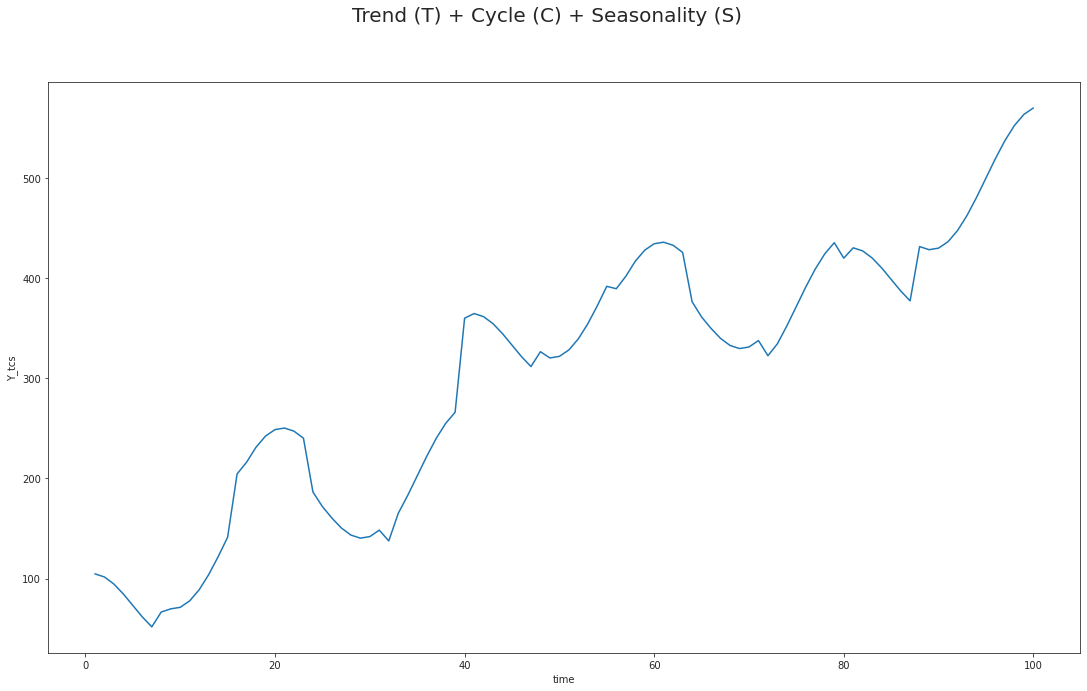

In [173]:
# plot trend + cycle + seasonality
Y_df.name = 'ucm_deterministic_trend_cycle_season'
plot_ts_and_save(Y_df, 'time', 'Y_tcs', 'Trend (T) + Cycle (C) + Seasonality (S)', plot_path)

/home/imarevic/Projects/bayes_struct_ts_intuition/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


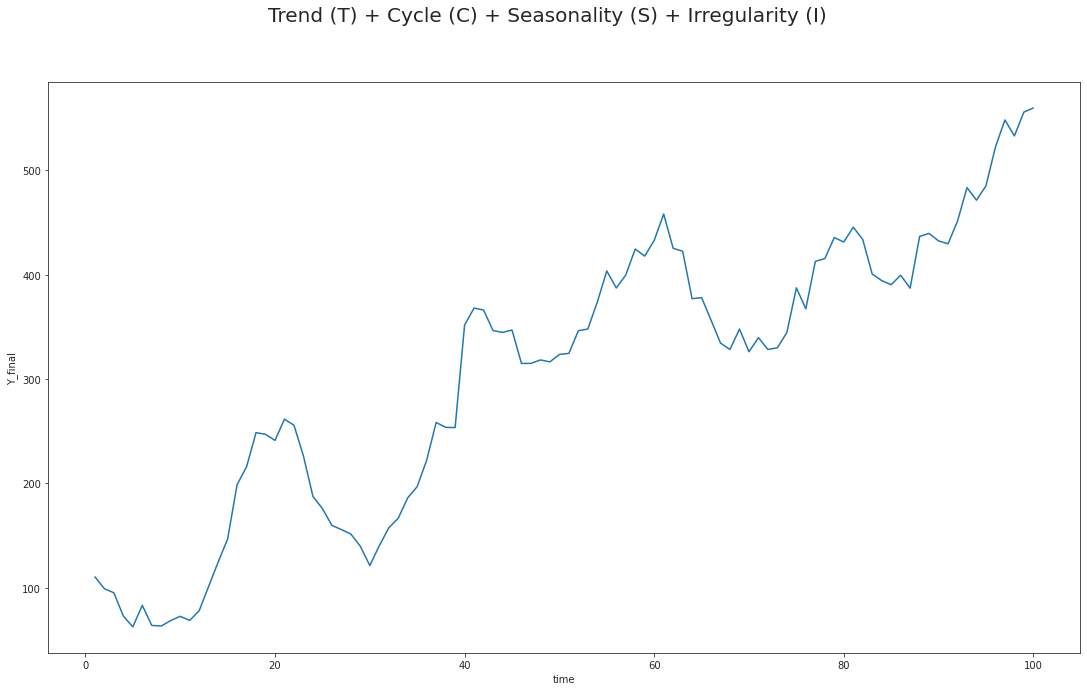

In [174]:
# plot final model
Y_df.name = 'ucm_deterministic_full_model'
plot_ts_and_save(Y_df, 'time', 'Y_final', 'Trend (T) + Cycle (C) + Seasonality (S) + Irregularity (I)', plot_path)